## Introduction
 - Aim : To analyse financial data of companies listed on the London Stock Exchange
 - Data Source : LST dataset containing 1549 rows and 9 columns
 

### 1. Data Processing

The dataset contains financial information about companies listed on the London Stock Exchange.  
We will first load the dataset and explore its structure to understand the available features.  

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from scipy.stats import boxcox

In [2]:
##Importing the dataset
df = pd.read_csv('LSE.csv')
df.head(5)

,Unnamed: 0,Sector,Subsector,Market Cap (£ m),Current Price per Share (pence),Net Asset Value per Share (pence),Gearing (%),Dividend Yield (%),Last Statement Year
0,1PM PLC,Financial Services,Specialty Finance,35.91,41.50,22.92,4.49,1.27,2018.0
1,1SPATIAL PLC,Support Services,Business Support Services,34.06,34.50,-0.49,-3.95,NaN,2018.0
2,21ST CENTURY TECHNOLOGY PLC,Support Services,Business Support Services,2.75,2.95,-2.05,348.69,NaN,2017.0
3,3I GROUP PLC,Financial Services,Specialty Finance,7524.93,774.00,720.73,NaN,3.49,2018.0
4,3I INFRASTRUCTURE PLC,Equity Investment Instruments,Equity Investment Instruments,2094.97,258.35,211.02,NaN,3.68,2018.0


In [3]:
#No. of rows and columns
df.shape

(1549, 9)

In [4]:
#list of columns
df.columns

Index(['Unnamed: 0', 'Sector', 'Subsector', 'Market Cap (£ m)',
       'Current Price per Share (pence)', 'Net Asset Value per Share (pence)',
       'Gearing (%)', 'Dividend Yield (%)', 'Last Statement Year'],
      dtype='object')

### 2. Data Cleaning

#### 2.1 Rename columns

In [5]:
#2.1 Rename columns
df.rename(columns={
    'Unnamed: 0': 'Company',  
    'Market Cap (£ m)': 'Market_Cap(£m)',  
}, inplace=True)

df.columns

Index(['Company', 'Sector', 'Subsector', 'Market_Cap(£m)',
       'Current Price per Share (pence)', 'Net Asset Value per Share (pence)',
       'Gearing (%)', 'Dividend Yield (%)', 'Last Statement Year'],
      dtype='object')

#### 2.2 Check for null values

In [6]:
#Get Null Values
df.isnull().sum()

Company                                1
Sector                                 1
Subsector                              1
Market_Cap(£m)                         1
Current Price per Share (pence)        3
Net Asset Value per Share (pence)    202
Gearing (%)                          814
Dividend Yield (%)                   758
Last Statement Year                   49
dtype: int64

### Observations and next steps
- Gearing% has 814 missing values, hence dropping the columns
- Company, Sector and Subsector cannot be filled with mode, as it might not show the correct picture hence replacing Null values with 'Unknown'
- Last Statement Year to be filled with mode (i.e. the most commonly occuring value)
- Market_Cap, Current Price per Share, Net Asset Value per share, Dividend Yield% : to be filled with median

In [7]:
#Drop Gearing %, as too many missing values
df.drop(columns=['Gearing (%)'], inplace=True)

# Handling missing values in one step
df.fillna({
    'Market_Cap(£m)': df['Market_Cap(£m)'].median(),  
    'Current Price per Share (pence)': df['Current Price per Share (pence)'].median(),
    'Net Asset Value per Share (pence)': df['Net Asset Value per Share (pence)'].median(),
    'Dividend Yield (%)' : df['Dividend Yield (%)'].median(),
    'Company' : 'Unknown',
    'Sector' : 'Unknown',
    'Subsector' : 'Unknown',
    'Last Statement Year' : df['Last Statement Year'].mode()[0]
}, inplace=True)


In [8]:
df.isnull().sum()

Company                              0
Sector                               0
Subsector                            0
Market_Cap(£m)                       0
Current Price per Share (pence)      0
Net Asset Value per Share (pence)    0
Dividend Yield (%)                   0
Last Statement Year                  0
dtype: int64

#### 2.3 Check data type

- Last Statement Year is of type float, hence converting it to int to get the Year value

In [9]:
df['Last Statement Year'] = df['Last Statement Year'].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Company                            1549 non-null   object 
 1   Sector                             1549 non-null   object 
 2   Subsector                          1549 non-null   object 
 3   Market_Cap(£m)                     1549 non-null   float64
 4   Current Price per Share (pence)    1549 non-null   float64
 5   Net Asset Value per Share (pence)  1549 non-null   float64
 6   Dividend Yield (%)                 1549 non-null   float64
 7   Last Statement Year                1549 non-null   object 
dtypes: float64(4), object(4)
memory usage: 96.9+ KB


In [11]:
df.head(5)

,Company,Sector,Subsector,Market_Cap(£m),Current Price per Share (pence),Net Asset Value per Share (pence),Dividend Yield (%),Last Statement Year
0,1PM PLC,Financial Services,Specialty Finance,35.91,41.50,22.92,1.27,2018.0
1,1SPATIAL PLC,Support Services,Business Support Services,34.06,34.50,-0.49,3.01,2018.0
2,21ST CENTURY TECHNOLOGY PLC,Support Services,Business Support Services,2.75,2.95,-2.05,3.01,2017.0
3,3I GROUP PLC,Financial Services,Specialty Finance,7524.93,774.00,720.73,3.49,2018.0
4,3I INFRASTRUCTURE PLC,Equity Investment Instruments,Equity Investment Instruments,2094.97,258.35,211.02,3.68,2018.0


#### 2.4 Check for any duplicate rows

In [12]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Company,Sector,Subsector,Market_Cap(£m),Current Price per Share (pence),Net Asset Value per Share (pence),Dividend Yield (%),Last Statement Year


- No duplicate rows identified, hence no further action required.

### 2.5 Handling Outliers
#### 1. Using boxplot to check for outliers 

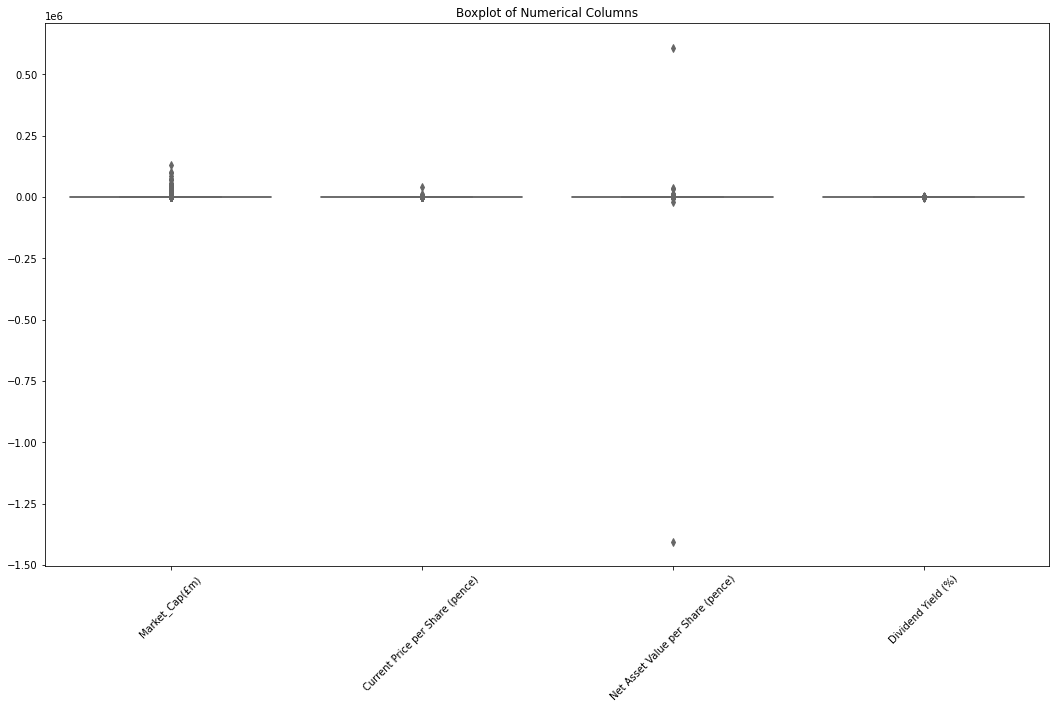

In [13]:
##Using boxplot to look for outliers
num_cols = ['Market_Cap(£m)', 'Current Price per Share (pence)', 
            'Net Asset Value per Share (pence)', 'Dividend Yield (%)']

plt.figure(figsize=(18, 10))
sns.boxplot(data=df[num_cols], palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()

#### 2. Removing outliers using IQR

In [14]:
### Removing outliers using IQR
Q1 = df['Net Asset Value per Share (pence)'].quantile(0.25)
Q3 = df['Net Asset Value per Share (pence)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Net Asset Value per Share (pence)'] >= lower_bound) & (df['Net Asset Value per Share (pence)'] <= upper_bound)]
df = df[(df['Market_Cap(£m)'] >= lower_bound) & (df['Market_Cap(£m)'] <= upper_bound)]
df = df[(df['Current Price per Share (pence)'] >= lower_bound) & (df['Current Price per Share (pence)'] <= upper_bound)]
df = df[(df['Dividend Yield (%)'] >= lower_bound) & (df['Dividend Yield (%)'] <= upper_bound)]


#### 3. Handling negative values

In [15]:
###checking values below 0
print('Market Cap : ', df[df['Market_Cap(£m)'] < 0])
print('Current price per share : ', df[df['Current Price per Share (pence)'] < 0])
print('Net Asset Value per Share : ', df[df['Net Asset Value per Share (pence)'] < 0])
print('Dividend Yield : ', df[df['Dividend Yield (%)'] < 0])

Market Cap :  Empty DataFrame
Columns: [Company, Sector, Subsector, Market_Cap(£m), Current Price per Share (pence), Net Asset Value per Share (pence), Dividend Yield (%), Last Statement Year]
Index: []
Current price per share :  Empty DataFrame
Columns: [Company, Sector, Subsector, Market_Cap(£m), Current Price per Share (pence), Net Asset Value per Share (pence), Dividend Yield (%), Last Statement Year]
Index: []
Net Asset Value per Share :                            Company                                Sector  \
1                    1SPATIAL PLC                      Support Services   
2     21ST CENTURY TECHNOLOGY PLC                      Support Services   
31        ACCESS INTELLIGENCE PLC      Software &amp; Computer Services   
37                     ADEPT4 PLC      Software &amp; Computer Services   
40       ADVANCED ONCOTHERAPY PLC  Health Care Equipment &amp; Services   
...                           ...                                   ...   
1473       VENTURE LIFE GRO

- Dividend Yield can not be negative, hence making it 0 for negative values
- Net Asset Value : replaced with median for negative value

In [16]:
df['Dividend Yield (%)'] = df['Dividend Yield (%)'].apply(lambda x: 0 if x < 0 else x)

median_nav = df[df['Net Asset Value per Share (pence)'] >= 0]['Net Asset Value per Share (pence)'].median()
df['Net Asset Value per Share (pence)'] = df['Net Asset Value per Share (pence)'].apply(lambda x: median_nav if x < 0 else x)


In [17]:
print(df.describe())

       Market_Cap(£m)  Current Price per Share (pence)  \
count      851.000000                       851.000000   
mean        62.562908                        62.388543   
std         73.844382                        71.844204   
min          0.120000                         0.020000   
25%          9.330000                         4.750000   
50%         32.680000                        33.900000   
75%         89.745000                        95.875000   
max        311.990000                       310.000000   

       Net Asset Value per Share (pence)  Dividend Yield (%)  
count                         851.000000          851.000000  
mean                           36.479553            3.658696  
std                            53.460949            7.063161  
min                             0.000000            0.000000  
25%                             4.215000            3.010000  
50%                            23.050000            3.010000  
75%                            29.17

In [18]:
print(df.isnull().sum())  # Ensure no missing values
print('Duplicate Values : ')
print(df.duplicated().sum())  # Ensure no duplicates

Company                              0
Sector                               0
Subsector                            0
Market_Cap(£m)                       0
Current Price per Share (pence)      0
Net Asset Value per Share (pence)    0
Dividend Yield (%)                   0
Last Statement Year                  0
dtype: int64
Duplicate Values : 
0


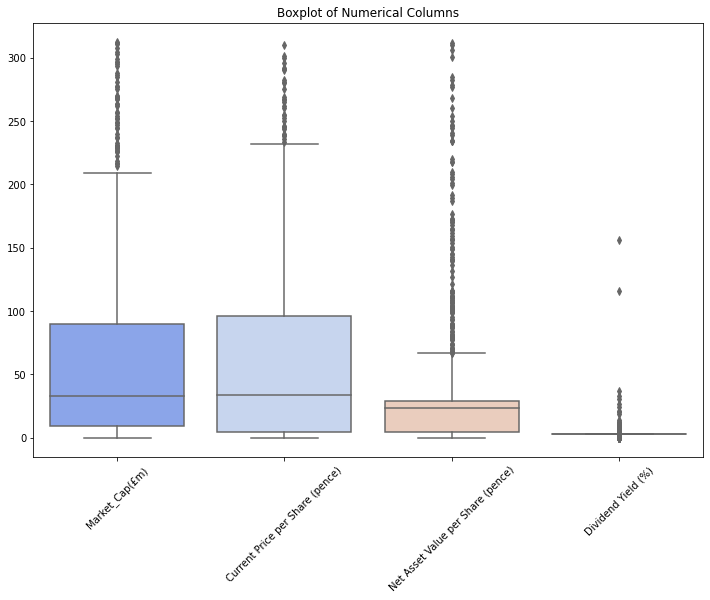

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols], palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()

### 3. Exploratory Data Analysis

#### 1. Summary statistics

In [20]:
df.describe()

,Market_Cap(£m),Current Price per Share (pence),Net Asset Value per Share (pence),Dividend Yield (%)
count,851.000000,851.000000,851.000000,851.000000
mean,62.562908,62.388543,36.479553,3.658696
std,73.844382,71.844204,53.460949,7.063161
min,0.120000,0.020000,0.000000,0.000000
25%,9.330000,4.750000,4.215000,3.010000
50%,32.680000,33.900000,23.050000,3.010000
75%,89.745000,95.875000,29.170000,3.010000
max,311.990000,310.000000,311.500000,156.250000


#### 2. Univariate Analysis 

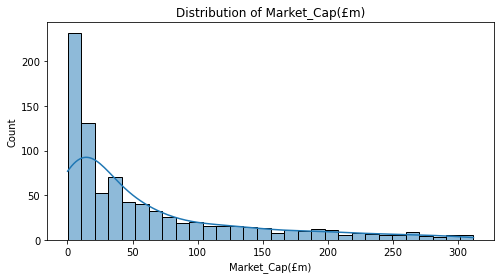

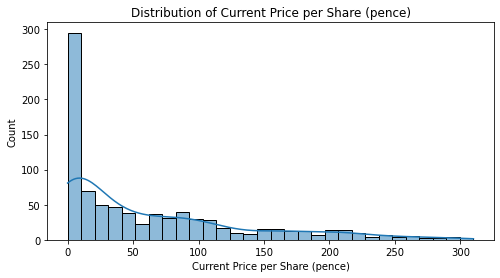

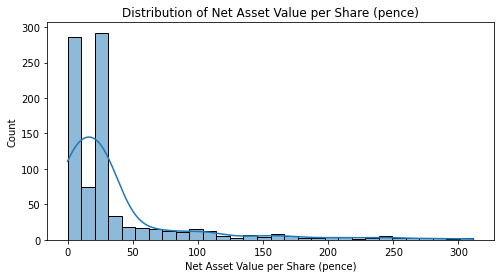

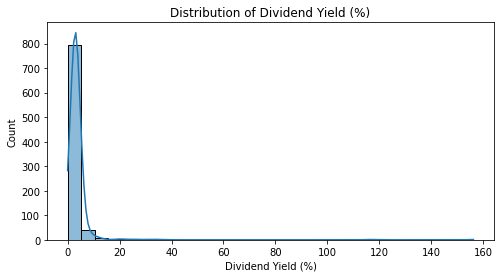

In [21]:
num_cols = ['Market_Cap(£m)', 'Current Price per Share (pence)', 
            'Net Asset Value per Share (pence)','Dividend Yield (%)']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Checking for skewness

In [22]:
skew_values = df[num_cols].skew()
skew_values

Market_Cap(£m)                        1.524957
Current Price per Share (pence)       1.294827
Net Asset Value per Share (pence)     2.748909
Dividend Yield (%)                   17.042656
dtype: float64

 #### Observation
- As we can see, all the skew_values are greater than 1, this means that the data is highly skewed and not normalized => majority of the values are very low
- To normalize, use log1p function for values>0
- For Dividend Yield (%), since the skewness is super high, hence using Box-Cox method

In [23]:
df['Dividend Yield (%)'] = np.log1p(df['Dividend Yield (%)'])
df['Market_Cap(£m)'] = np.log1p(df['Market_Cap(£m)'])
df['Current Price per Share (pence)'] = np.log1p(df['Current Price per Share (pence)'])
df['Net Asset Value per Share (pence)'] = np.log1p(df['Net Asset Value per Share (pence)'])

In [24]:
#Box-Cox to further reduce skewness of Dividend Yield
df['Dividend Yield (%)'], _ = boxcox(df['Dividend Yield (%)'] + 1)

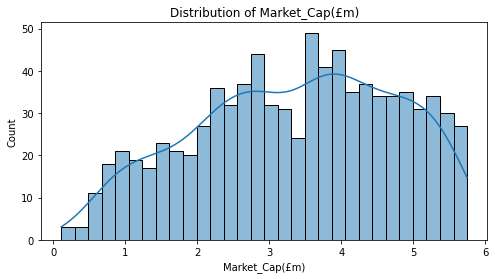

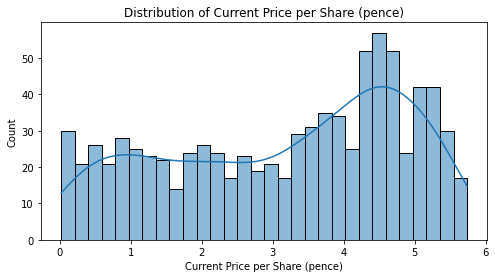

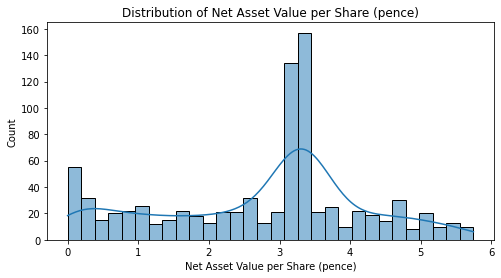

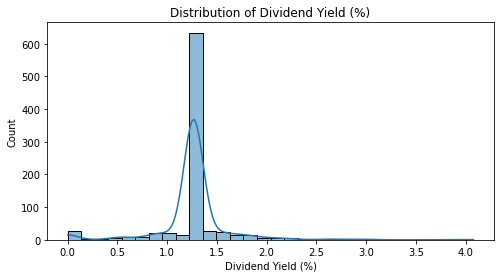

In [25]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [26]:
skew_values = df[num_cols].skew()
skew_values

Market_Cap(£m)                      -0.223918
Current Price per Share (pence)     -0.358776
Net Asset Value per Share (pence)   -0.321499
Dividend Yield (%)                   0.523638
dtype: float64

#### 3. Bivariate Analysis

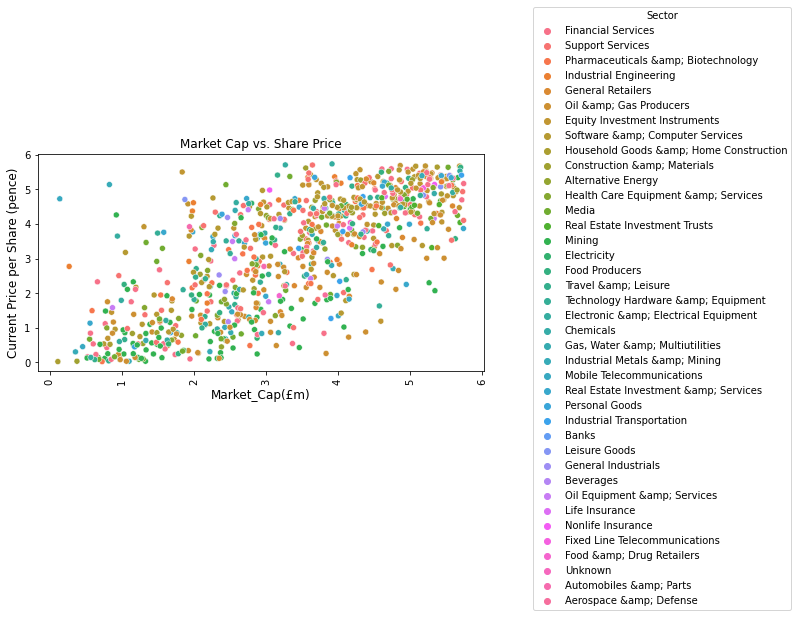

In [27]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Market_Cap(£m)'], y=df['Current Price per Share (pence)'], hue=df['Sector'])
plt.xticks(rotation=90)
plt.title('Market Cap vs. Share Price')
plt.xlabel("Market_Cap(£m)", fontsize=12)
plt.ylabel("Current Price per Share (pence)", fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.7, 1.7), loc="upper right")
plt.show()

## Observations
- Positive Correlation:
    Companies with higher market capitalization tend to have higher share prices.
    However, the relationship is not perfectly linear, suggesting that other factors (e.g., earnings, sector  trends) also influence share prices.

- Skewed Market Cap Distribution:
    A few companies have extremely high market caps, creating a concentration of points on the lower end.
- Outliers:
    Some low-market-cap companies have high share prices, indicating that a stock is trading at a price higher than it's intrinsic value, highlighting excessive market hype
    Conversely, some high-market-cap companies have relatively lower share prices, which could indicate strong fundamentals but lower growth potential.

- Sector Influence:
    Different sectors have distinct price-to-market-cap relationships.
    Some industries (e.g., Financial Services, Investment Trusts) have higher market caps but moderate share prices.
    Others (e.g., Tech, Pharmaceuticals) have high share prices despite smaller market caps.   

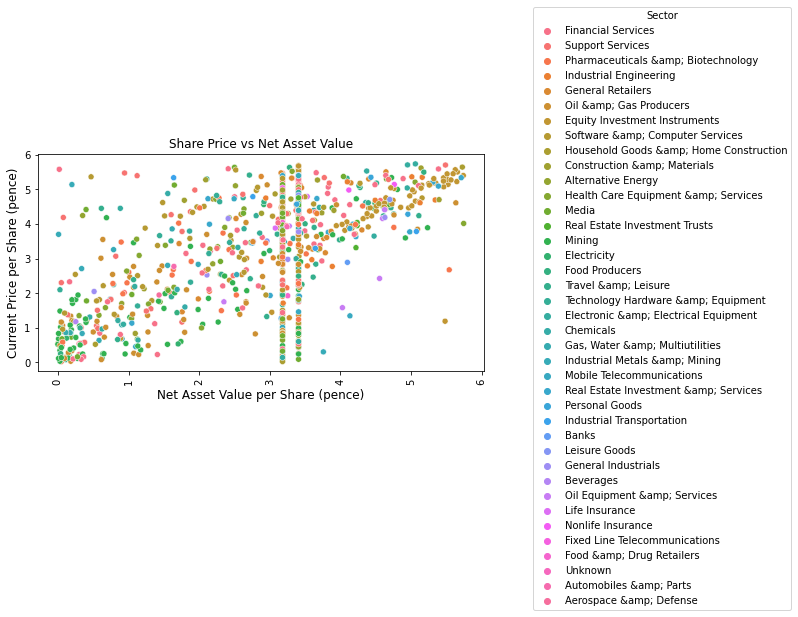

In [28]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Net Asset Value per Share (pence)'], y=df['Current Price per Share (pence)'], hue=df['Sector'])
plt.xticks(rotation=90)
plt.title('Share Price vs Net Asset Value')
plt.xlabel("Net Asset Value per Share (pence)", fontsize=12)
plt.ylabel("Current Price per Share (pence)", fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.7, 1.7), loc="upper right")
plt.show()

## Observations

- Positive Correlation with Variability:
    Generally, companies with higher Net Asset Value (NAV) per Share tend to have higher Share Prices.
    However, there are significant variations, suggesting other factors (like market sentiment, profitability, or sector trends) influence share prices.
    Companies Trading at a Discount/Premium to NAV:

- Some companies have share prices lower than their NAV per Share, meaning they trade at a discount, which could be because people might believe that their prices might fall down in the future
- Others have higher share prices than their NAV per Share, meaning they trade at a premium, likely due to growth potential or strong investor demand.

- Outliers:
   A few companies show very high NAV per Share (eg: Mobile Telecommunications, etc.) but relatively lower share prices, which might indicate undervalued stocks.
    Conversely, some companies with low NAV per Share have significantly higher share prices (Eg : Industrail Engg, Equity Investments, etc.), possibly due to strong earnings or investor hype.
    
- Sector wise Analysis
    - Investment Trusts & Financial Services → Many companies are close to NAV but some trade at a discount.
    - Technology & Pharmaceuticals → More companies trade above NAV, suggesting strong investor confidence in growth.
    - Industrials & Consumer Services → More spread out, with both premiums and discounts visible.

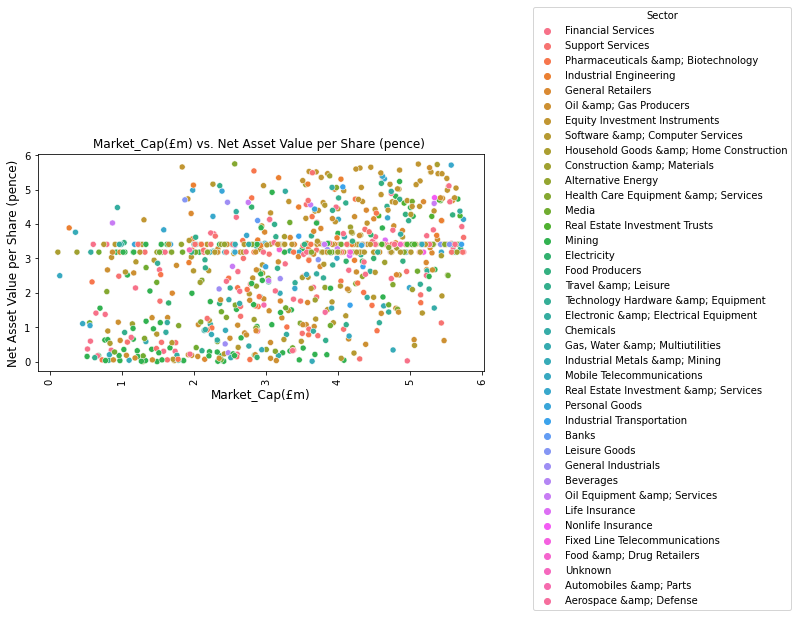

In [29]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Market_Cap(£m)'], y=df['Net Asset Value per Share (pence)'], hue=df['Sector'])
plt.xticks(rotation=90)
plt.title('Market_Cap(£m) vs. Net Asset Value per Share (pence) ')
plt.xlabel("Market_Cap(£m)", fontsize=12)
plt.ylabel("Net Asset Value per Share (pence)", fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.7, 1.7), loc="upper right")
plt.show()

## Observations
- Positive Correlation with Sector Variability:
   -  Higher Market Cap (£m) generally corresponds to higher Net Asset Value per Share, but there are sector-specific deviations.
   -  Some sectors have large market cap companies with relatively lower NAV per Share, indicating market premium valuations.

- Sector-Based Trends:
   -  Investment Trusts & Financial Services → Many firms have high Market Cap but moderate NAV per Share, suggesting diversified investments.
   -  Technology & Pharmaceuticals → Some firms have low-to-mid Market Cap but higher NAV per Share, indicating asset-heavy balance sheets.
   - Industrials & Consumer Services → More spread out, showing both high and low valuations.

- Outliers:

    - A few firms have extremely high Market Cap but lower NAV per Share, meaning investors price in future earnings potential.
    - Some smaller market cap firms have high NAV per Share, possibly indicating undervaluation.


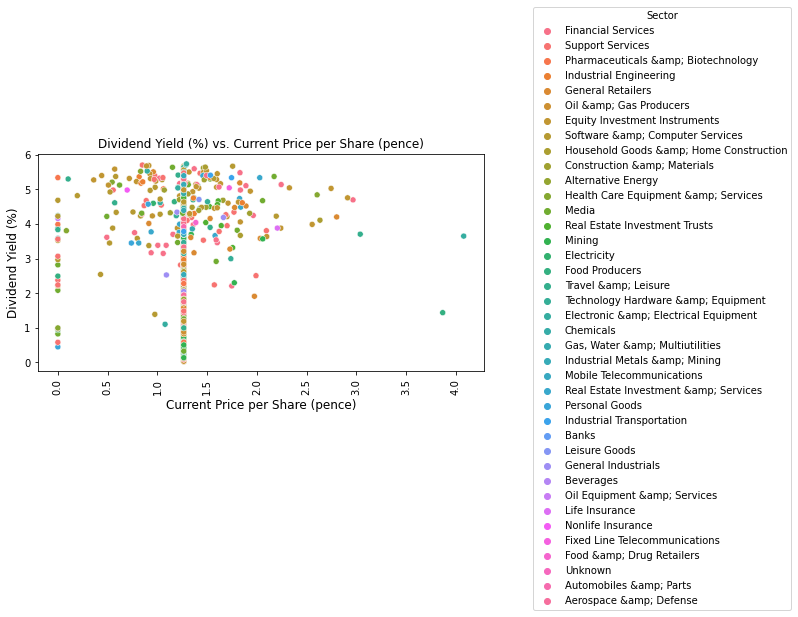

In [30]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Dividend Yield (%)'], y=df['Current Price per Share (pence)'], hue=df['Sector'])
plt.xticks(rotation=90)
plt.title('Dividend Yield (%) vs. Current Price per Share (pence)')
plt.xlabel("Current Price per Share (pence)", fontsize=12)
plt.ylabel("Dividend Yield (%)", fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.7, 1.7), loc="upper right")
plt.show()

## Observations
No Correlation with Sector Variability:
Dividend Yield does not show a strong correlation with Current Price per Share as multiple companies having different Dividend Yield have the same Current Share Price 

There is no consistent relationship between the two. Though majority of the companies have lower share prices even if the Dividend Yield is high.

Sector-Based Trends:
Equity Investment Instruments & Financial Services: These firms have high dividend yield, yet low share prices ranging around 1.5 pence per share
Technology & Growth Sectors (e.g., Software, Alternative Energy) → Some firms exhibit low or zero dividends, as expected from growth-focused companies.
Consumer Goods & Industrials → Scattered across price points, showing mixed dividend policies.

Outliers:
Few companies have high dividend yield around 5% even at lower share prices stating they are in financial distress.
Some companies have 0 dividend yield, even after having low share prices which means they might be at the early stage and could be non dividend paying firms.

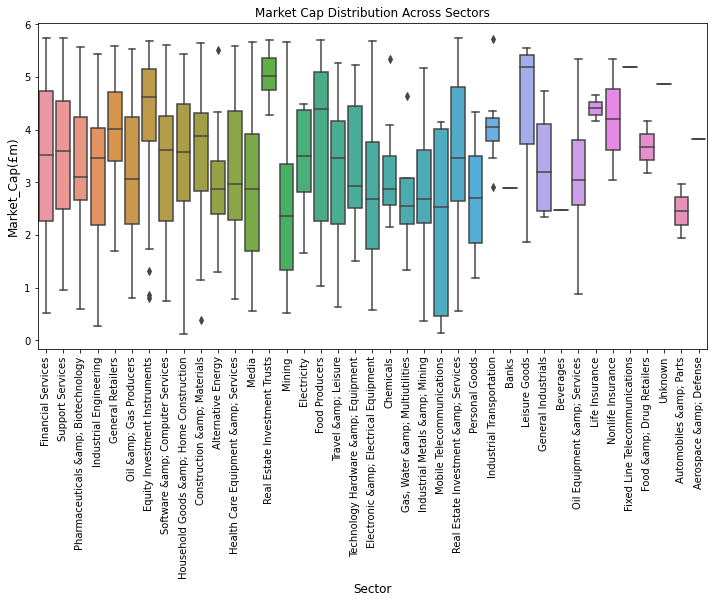

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Sector", y="Market_Cap(£m)", data=df)
plt.xticks(rotation=90)
plt.title("Market Cap Distribution Across Sectors")
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Market_Cap(£m)", fontsize=12)
plt.show()

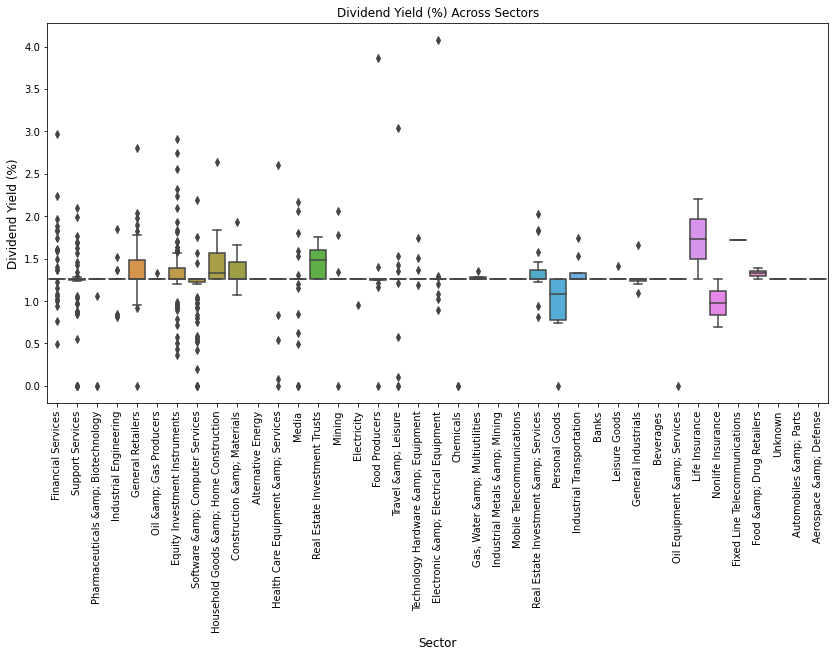

In [32]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="Sector", y="Dividend Yield (%)", data=df)
plt.xticks(rotation=90)
plt.title("Dividend Yield (%) Across Sectors")
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Dividend Yield (%)", fontsize=12)
plt.show()

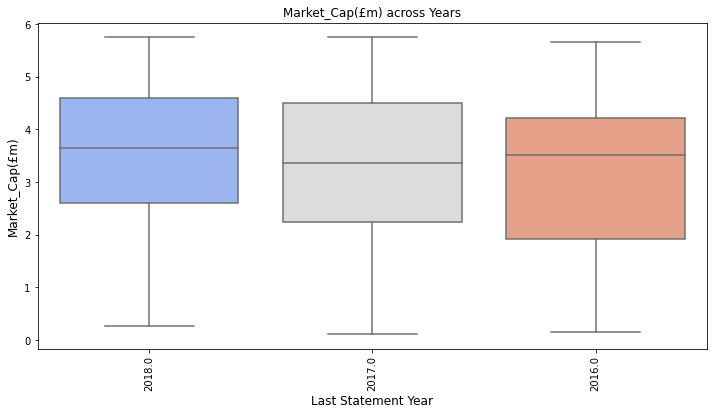

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Last Statement Year", y="Market_Cap(£m)", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Market_Cap(£m) across Years")
plt.xlabel("Last Statement Year", fontsize=12)
plt.ylabel("Market_Cap(£m)", fontsize=12)
plt.show()

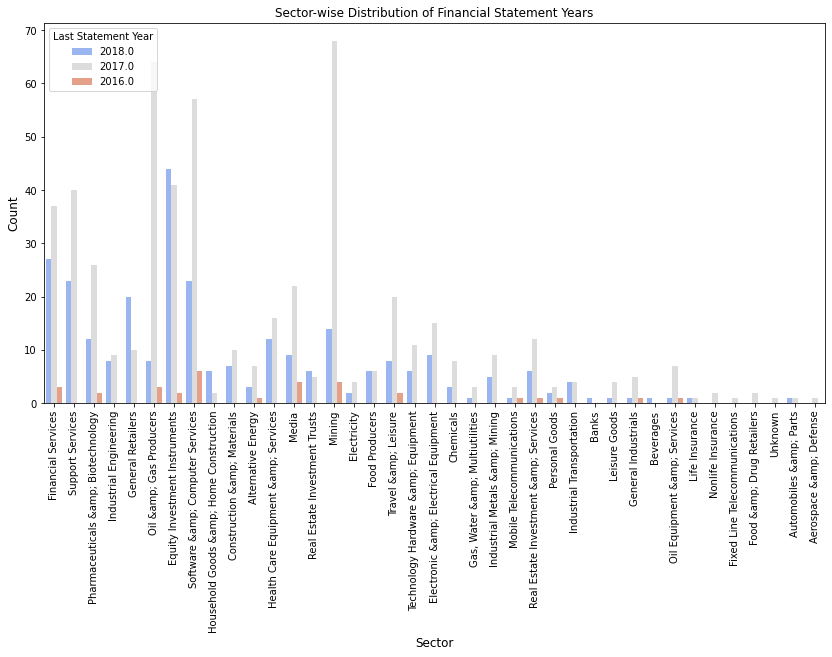

In [34]:
plt.figure(figsize=(14, 7)) 
sns.countplot(x="Sector", hue="Last Statement Year", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Sector-wise Distribution of Financial Statement Years")
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

#### 3. Corelation Matrix

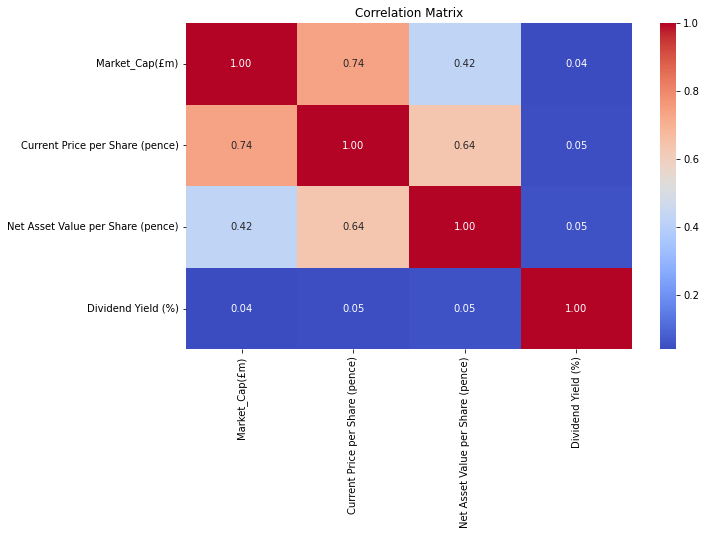

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

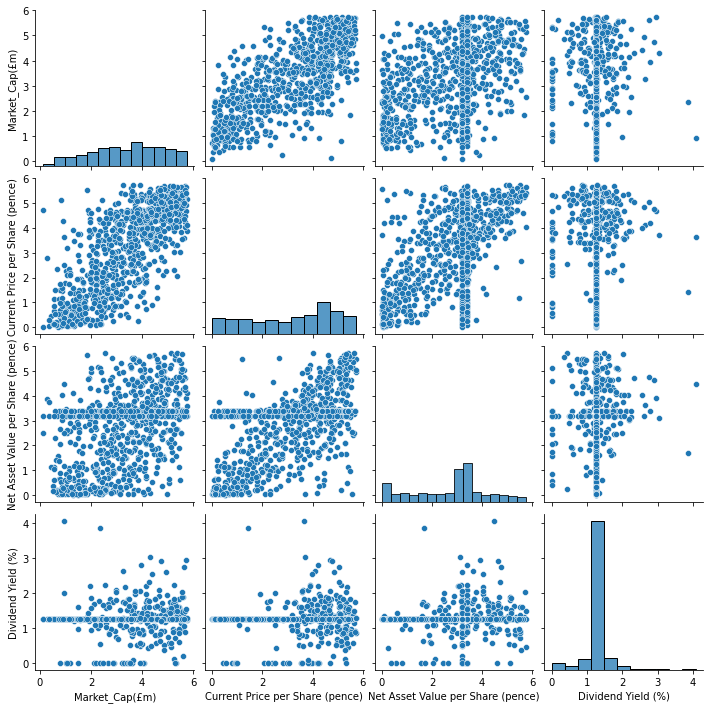

In [36]:
sns.pairplot(df)
plt.show()

#### 4. Time Series Analysis

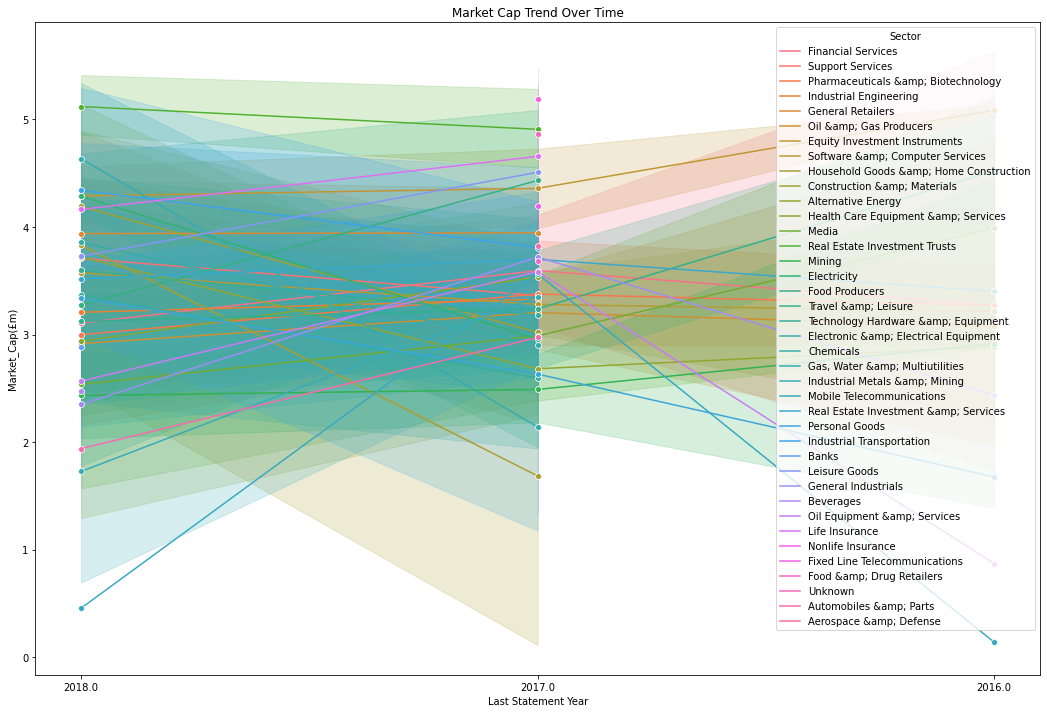

In [37]:
df['Last Statement Year'] = df['Last Statement Year'].astype(str)
plt.figure(figsize=(18,12))
sns.lineplot(x='Last Statement Year', y='Market_Cap(£m)', data=df, hue='Sector', marker="o")
plt.title("Market Cap Trend Over Time")
plt.show()